In [153]:
import numpy as np
import pandas as pd

# Sklearn 
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics

# Vizualization
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics models
import statsmodels.api as sm

In [154]:
# Load Boston dataset from Sklearn
boston = load_boston()

In [155]:
# This dataset is in a form of dictionary so we can check its keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [156]:
print(boston.data.shape)

(506, 13)


This dataset consists of 506 rows and 13 columns.

In [157]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Below we can check what the column names mean.

In [158]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [159]:
# Define the data/predictors as the pre-set feature names  
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(boston.target, columns=["MEDV"])

In [160]:
# Show first 5 rows
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we can split our dataset into train and test. This is done to prevent overfitting. We will train our model on 70% of data and test the model performance with the remaining 30%

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


## Multiple Linear regression

In [162]:
# Fit linear regression 
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

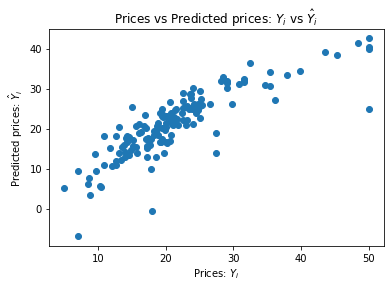

In [163]:
# Predict house prices and plot the differences between actual prices and predicted values 
y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [164]:
# Look at the coefficients 
coef_values = pd.DataFrame(lm.coef_, index=['Coefficient']).transpose()
att_names = pd.DataFrame(X.columns, columns=['Attribute'])
coef_df = pd.concat([att_names,coefs_values], axis=1, join='inner')
coef_df

,Attribute,Coefficient
0,CRIM,-0.132722
1,ZN,0.026249
2,INDUS,-0.007801
3,CHAS,3.338702
4,NOX,-16.139852
5,RM,4.114360
6,AGE,-0.011098
7,DIS,-1.366601
8,RAD,0.121465
9,TAX,-0.939701


In [165]:
lm.intercept_

array([31.63108404])

Text(0, 0.5, 'House price in $1000s')

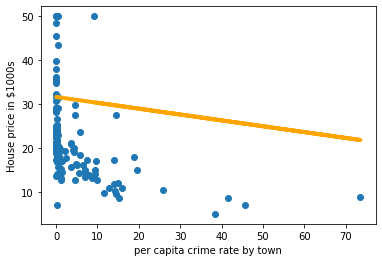

In [166]:
plt.scatter(X_test['CRIM'], y_test)
yhat = 31.63108404 + (-1.33470103e-01 * X_test['CRIM'] )
fig = plt.plot(X_test['CRIM'], yhat, lw=4, c='orange', label='regression line')
plt.xlabel('per capita crime rate by town')
plt.ylabel('House price in $1000s')

Text(0, 0.5, 'House price in $1000s')

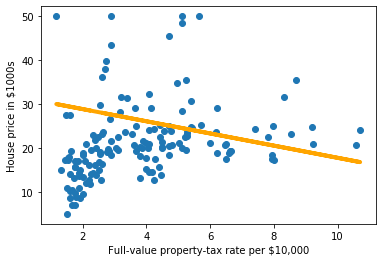

In [167]:
plt.scatter(X_test['DIS'], y_test)
yhat = 31.63108404 + (-1.38599824e+00* X_test['DIS'] )
fig = plt.plot(X_test['DIS'], yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Full-value property-tax rate per $10,000')
plt.ylabel('House price in $1000s')

In [168]:
print('Coefficient of determination R^2 of the prediction: {:.2f}'.format(lm.score(X_test,y_test)))

Coefficient of determination R^2 of the prediction: 0.71


In [169]:
print('Mean Absolut Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolut Error:  3.1627098714573783
Mean Squared Error:  21.517444231176995
Root Mean Squared Error:  4.638689926172797


## Recursive Feature Elimination (RFE)

RFE is a feature selection technique for analysing feature importance. RFE firstly trains the linear regresion  on full set of feratures .Then, in each next iteration the least important features are pruned from used set of features. This procedure is repeated until the desired number of features is reached. 

In [170]:
# Create a list of feature names
final_features = X.columns.values.tolist()

rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False  True  True
  True]
[1 1 1 1 1 1 1 1 1 2 1 1 1]


In [171]:
rfe_X_train = X_train.drop(['TAX'], axis = 1)
rfe_X_test = X_test.drop(['TAX'], axis = 1)

In [172]:
# See whether prediction improves without the least 
model = lm.fit(rfe_X_train, y_train)
y_pred = lm.predict(rfe_X_test)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(lm.score(rfe_X_test,y_test)))

Accuracy of linear regression classifier on test set: 0.70


In [173]:
print('Coefficient of determination R^2 of the prediction: {:.2f}'.format(lm.score(rfe_X_test,y_test)))
print('Mean Absolut Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficient of determination R^2 of the prediction: 0.70
Mean Absolut Error:  3.2412913600989595
Mean Squared Error:  22.47426702288998
Root Mean Squared Error:  4.74070322029232
